Linear Regression Project - Solutions
An Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Ecommerce Customers')

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


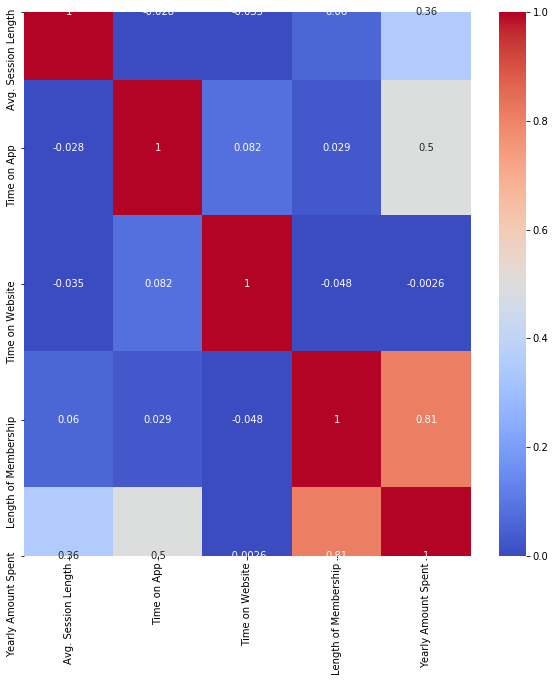

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmin =0,vmax=1,annot=True,cmap='coolwarm')

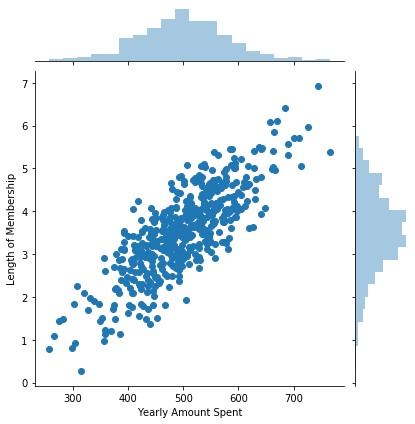

In [14]:
sns.jointplot(x=df['Yearly Amount Spent'],y=df['Length of Membership'])

In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

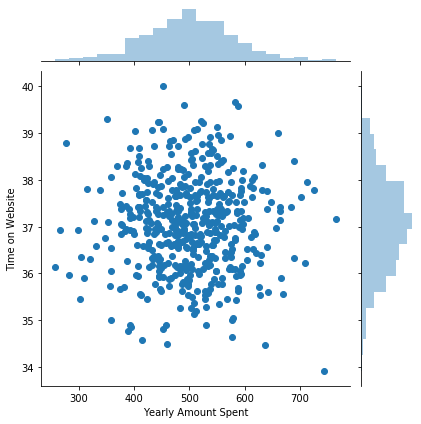

In [17]:
sns.jointplot(x=df['Yearly Amount Spent'],y=df['Time on Website'])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [76]:
y=df['Yearly Amount Spent']

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr = LinearRegression()

In [86]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
pred = lr.predict(X_test)

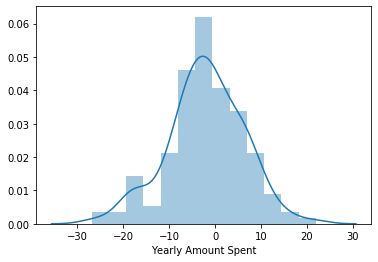

In [88]:
sns.distplot((y_test-pred))

In [89]:
from sklearn import metrics

In [90]:
print(metrics.mean_absolute_error(y_test,pred))

6.656542204988


In [91]:
print(metrics.mean_squared_error(y_test,pred))

73.545834233033


In [92]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

8.575886789891353

In [97]:
cols = X_train.columns

In [95]:
lr.coef_

array([25.76190696, 38.94677496,  0.42149932, 61.16327413])

In [101]:
coef = pd.DataFrame(cols,lr.coef_,columns=['Coefficient'])
coef

,Coefficient
25.761907,Avg. Session Length
38.946775,Time on App
0.421499,Time on Website
61.163274,Length of Membership


Do you think the company should focus more on their mobile app or on their website?

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!